In [1]:
import pyodbc
import pandas as pd


In [3]:
CONNECTION_STRING = "DRIVER={ODBC Driver 17 for SQL Server};SERVER=localhost;DATABASE=FinalExamination;UID=minhlab;PWD=12345"
connection = pyodbc.connect(CONNECTION_STRING)

## BAI 1. SQL

In [8]:
df_1a = pd.read_sql('SELECT product_name, quantity_in_stock FROM products', connection)
df_1a

C:\Users\DELL\AppData\Local\Temp\ipykernel_15296\302817693.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_1a = pd.read_sql(


,product_name,quantity_in_stock
0,Cà chua,100
1,Dưa hấu,50
2,Khoai tây,200
3,Cà rốt,150
4,Hành tây,120
5,Bí đỏ,80
6,Ổi,150
7,Ớt chuông,100
8,Bông cải xanh,120
9,Bắp cải,130


In [9]:
# b, tính tổng doanh thu bán hàng theo ngày
df_1b = pd.read_sql('SELECT total_amount FROM orders', connection)
Tong = df_1b.sum()
print('Tổng doanh thu là', Tong)


Tổng doanh thu là total_amount    3345000.0
dtype: float64


C:\Users\DELL\AppData\Local\Temp\ipykernel_15296\426503440.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_1b = pd.read_sql('SELECT total_amount FROM orders', connection)


In [113]:
sum = 0
for i in df_1b["total_amount"]:
    sum += i
sum

3345000.0

In [29]:
# c, Tìm khách hàng đã mua hàng nhiều nhất (tính theo số lượng đơn hàng).
SQL_STATEMENT = """
WITH count_orders as
(
	SELECT ord.customer_id, COUNT(ord.customer_id) as n_orders
	FROM customers as cs, orders as ord
	WHERE cs.customer_id = ord.customer_id
	GROUP BY ord.customer_id
)

SELECT TOP 1 customers.first_name + ' ' + customers.last_name AS customer_name, count_orders.n_orders
FROM count_orders, customers
WHERE count_orders.customer_id = customers.customer_id
ORDER BY n_orders DESC;
"""

df_1c = pd.read_sql(SQL_STATEMENT, connection)
df_1c


C:\Users\DELL\AppData\Local\Temp\ipykernel_15296\1797726579.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_1c = pd.read_sql(SQL_STATEMENT, connection)


,customer_name,n_orders
0,Nguyễn Văn A,2


In [33]:
# 1d, Liệt kê tên sản phẩm, số lượng và tổng tiền của đơn hàng có ID là 10.
SQL_STATEMENT3 = """
SELECT order_id, product_name, quantity, price * quantity as total_price
FROM products INNER JOIN order_items ON products.product_id = order_items.product_id
WHERE order_id = 10
"""
sql_query3 = pd.read_sql(SQL_STATEMENT3, connection)
df3 = pd.DataFrame(sql_query3)
df3


C:\Users\DELL\AppData\Local\Temp\ipykernel_15296\2095779487.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sql_query3 = pd.read_sql(SQL_STATEMENT3, connection)


,order_id,product_name,quantity,total_price
0,10,Hành tây,3,225000.0
1,10,Bắp cải,1,18000.0


In [ ]:
# 1e, Tìm tên sản phẩm, số lượng tồn kho và tên nhà cung cấp
# EROR

## BAI 2. PANDAS

In [35]:
# 2a. Tính tổng doanh thu bán hàng theo tháng
df_2a = pd.read_sql("SELECT * FROM orders", connection)
df_2a

C:\Users\DELL\AppData\Local\Temp\ipykernel_15296\324008531.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_2a = pd.read_sql(ST, connection)


,order_id,customer_id,order_date,total_amount
0,1,1,2023-04-01,120000.0
1,2,1,2023-04-02,450000.0
2,3,3,2023-04-03,90000.0
3,4,4,2023-04-04,240000.0
4,5,5,2023-04-05,60000.0
5,6,6,2023-04-06,120000.0
6,7,7,2023-04-07,300000.0
7,8,8,2023-04-08,180000.0
8,9,9,2023-04-09,210000.0
9,10,10,2023-04-10,150000.0


In [47]:
df_2a["month"] = pd.DatetimeIndex(df_2a.order_date).month

In [51]:
df_2a.groupby(by=["month"])["total_amount"].sum()

month
4    3345000.0
Name: total_amount, dtype: float64

In [58]:
# 2b. Liệt kê tên và số lượng sản phẩm theo danh mục, sử dụng dataframe
df_category = pd.read_sql('SELECT * FROM categories', connection)
df_product = pd.read_sql('SELECT * FROM products', connection)

C:\Users\DELL\AppData\Local\Temp\ipykernel_15296\1517291180.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_category = pd.read_sql('SELECT * FROM categories', connection)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15296\1517291180.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_product = pd.read_sql('SELECT * FROM products', connection)


In [67]:
df_2b = pd.merge(df_category, df_product, how="inner", on="category_id")[["product_name", "category_name"]]
df_2b

,product_name,category_name
0,Cà chua,Hoa quả
1,Dưa hấu,Hoa quả
2,Bí đỏ,Hoa quả
3,Ổi,Hoa quả
4,Táo,Hoa quả
5,Lê,Hoa quả
6,Khoai tây,Rau củ
7,Cà rốt,Rau củ
8,Hành tây,Rau củ
9,Ớt chuông,Rau củ


In [70]:
# 2c. Tìm khách hàng có tổng số tiền mua hàng lớn nhất
df_order = pd.read_sql('SELECT * FROM orders', connection)
df_customer = pd.read_sql("SELECT * FROM customers", connection)

C:\Users\DELL\AppData\Local\Temp\ipykernel_15296\2586426060.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_order = pd.read_sql('SELECT * FROM orders', connection)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15296\2586426060.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_customer = pd.read_sql("SELECT * FROM customers", connection)


In [76]:
df_customer["full_name"] = df_customer["first_name"] + " " + df_customer["last_name"]

In [79]:
df_2c = pd.merge(df_order, df_customer, how="inner", on="customer_id")[["customer_id", "full_name", "total_amount"]]
df_2c

,customer_id,full_name,total_amount
0,1,Nguyễn Văn A,120000.0
1,1,Nguyễn Văn A,450000.0
2,3,Phạm Thị C,90000.0
3,4,Lê Văn D,240000.0
4,5,Hoàng Ngọc E,60000.0
5,6,Vũ Ngọc F,120000.0
6,7,Đỗ Thị G,300000.0
7,8,Huỳnh Minh H,180000.0
8,9,Phan Thanh I,210000.0
9,10,Bùi Quang J,150000.0


In [102]:
df_2c = df_2c.groupby(["customer_id", "full_name"])["total_amount"].sum().reset_index()
df_2c.loc[df_2c.total_amount.idxmax()]

customer_id                1
full_name       Nguyễn Văn A
total_amount        570000.0
Name: 0, dtype: object

In [106]:
# 2d. Liệt kê các đơn hàng có tổng giá trị lớn hơn 300,000
df_order = pd.read_sql('SELECT * FROM orders', connection)
df_order.loc[df_order.total_amount > 300000, ["order_id", "total_amount"]]

C:\Users\DELL\AppData\Local\Temp\ipykernel_15296\2221689914.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_order = pd.read_sql('SELECT * FROM orders', connection)


,order_id,total_amount
1,2,450000.0
11,12,330000.0
13,14,390000.0


In [ ]:
# 2e. Tính trung bình giá trị đơn hàng theo từng khách hàng


# BAI 3. CHART

C:\Users\DELL\AppData\Local\Temp\ipykernel_15296\1431567353.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_3a = pd.read_sql('SELECT order_date,total_amount FROM orders', connection)


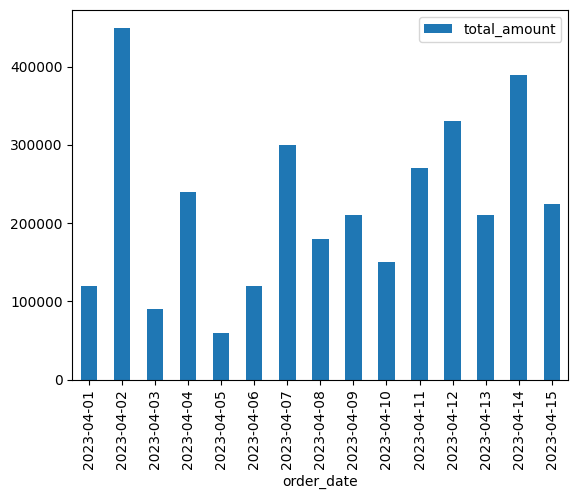

In [120]:
# 3a. Vẽ biểu đồ cột (bar chart) thể hiện doanh thu bán hàng theo ngày
import matplotlib.pyplot as plt
df_3a = pd.read_sql('SELECT order_date,total_amount FROM orders', connection)
df_3a.plot.bar(x='order_date', y='total_amount')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_15296\3378134111.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_3a = pd.read_sql('SELECT customer_id,total_amount FROM orders', connection)


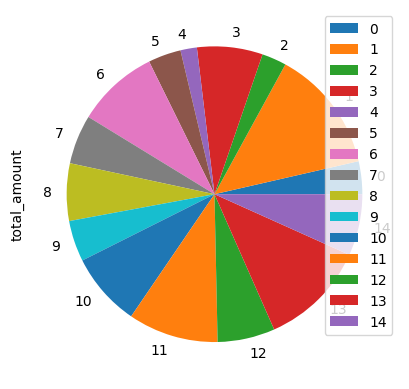

In [122]:
# b. Vẽ biểu đồ tròn (pie chart) thể hiện tỷ lệ tổng tiền mua hàng của từng khách hàng.
df_3a = pd.read_sql('SELECT customer_id, total_amount FROM orders', connection)
df_3a.plot.pie(x='order_date', y='total_amount')
plt.show()